#  My MCMC Simulation


In [179]:
########################libraries ################
import numpy as np
import pymc3 as pm
import math
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns`
import random
import sys
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm




#%


#loading the df
all_peptide_df=pd.read_csv("C:/Users/Elinor/Desktop/תואר שני/thesis_codes/Random_wallk_files/10001_peptide_df.csv")
all_peptide_df.drop(columns="Unnamed: 0",inplace=True)
all_peptide_df["median"]=all_peptide_df.iloc[:,1:27].median(axis=1)
all_peptide_df["total_binders"]=all_peptide_df["SB"]+all_peptide_df["WB"]



In [181]:
#################################################### Params ###########################
params={}
params["probability_function"]=lambda x :1.0/(1+math.exp(x) +0.1) #arbitrary probability function 
params["seed"]=random.seed(42)




In [79]:
all_peptide_df

Peptide  HLA-A*3301  HLA-B*5801  HLA-A*0201  HLA-B*3501  HLA-A*3002  \
0      GCKWCFMVP       90.00       71.43       73.75       90.00       55.71   
1      GCKWCFWVP       83.33       50.24       69.17       75.00       62.02   
2      GCKRCFWVP       80.00       47.33       73.75       85.00       49.56   
3      GCKRCFWQP       71.00       46.83       70.00       85.00       46.82   
4      GCKRCFWAP       78.00       57.67       69.17       85.00       58.66   
...          ...         ...         ...         ...         ...         ...   
9996   LWHTEWHMI       18.73       24.58       28.11       33.00       17.54   
9997   LWHTENHMI       21.21       19.45       20.84       26.05       20.79   
9998   LWHTENNMI       35.82       37.69       37.10       33.75       30.45   
9999   LWHTENNYI       25.48       30.04       26.50       28.64       19.86   
10000  LWHTENNYQ       22.69       80.00       87.50       59.00       39.67   

       HLA-A*0206  HLA-A*2601  HLA-B*4001  HLA-A*0203  ...  NB  SB  WB  \
0           76.43       95.00       70.00       54.44  ...  27   0   0   
1           72.00       95.00       85.00       67.14  ...  27   0   0   
2           69.23       95.00       75.00       66.43  ...  27   0   0   
3           61.00       95.00       75.00       60.56  ...  27   0   0   
4           62.25       90.00       75.00       55.00  ...  27   0   0   
...           ...         ...         ...         ...  ...  ..  ..  ..   
9996        29.35       40.33       27.71       25.56  ...  25   1   1   
9997        25.29       30.93       23.25       20.27  ...  25   0   2   
9998        38.76       39.83       29.00       26.04  ...  25   0   2   
9999        31.67       36.43       27.86       21.92  ...  25   0   2   
10000       86.67       66.25       65.00       81.67  ...  27   0   0   

       nb_supertypes  sb_supertypes  wb_supertypes  sb_super_type_id  \
0                 11              0              0                []   
1                 11              0              0                []   
2                 11              0              0                []   
3                 11              0              0                []   
4                 11              0              0                []   
...              ...            ...            ...               ...   
9996               9              1              1           ['A24']   
9997              10              0              1                []   
9998              10              0              1                []   
9999              10              0              1                []   
10000             11              0              0                []   

       wb_super_type_id  median  total_binders  
0                    []  76.550              0  
1                    []  80.835              0  
2                    []  75.000              0  
3                    []  70.000              0  
4                    []  72.500              0  
...                 ...     ...            ...  
9996            ['A24']  27.105              2  
9997            ['A24']  21.025              2  
9998            ['A24']  31.630              2  
9999            ['A24']  27.180              2  
10000                []  65.155              0  

[10001 rows x 41 columns]

In [201]:
########################## functions ###############################################
def simulation(df,function,col_contains_data):
    """gets df,function, and the column that contains the data with the score im intrsted to check ,
    insert the data of each row into the column and return optimization graph"""
    probabilty_res_MCMC=[]
    all_data_prob=[] #for comparing between the normal and the MCMC
    delta=df[str(col_contains_data)].diff() #Calculating the delta between two values in the columns
    delta.dropna(inplace=True) #deliting the first row from the df because of the first delta in None
    df.drop([0],inplace=True)
    for score in delta:
        prob_res=params["probability_function"](score)
        params["seed"]
        #print(prob_res)
        random_toss=random.random()
        all_data_prob.append(prob_res)
        if random_toss<=prob_res:
            probabilty_res_MCMC.append("True") #true if the results are under the probability calculated    
        elif random_toss>prob_res :
            probabilty_res_MCMC.append("False")
    df["probabilty_res_MCMC"]=probabilty_res_MCMC
    df["all_data_prob"] =all_data_prob 
    df["delta"]=delta 
    return df 



In [202]:
df=simulation(all_peptide_df,params["probability_function"],"min_rank")      


In [210]:
df

Peptide  HLA-A*3301  HLA-B*5801  HLA-A*0201  HLA-B*3501  HLA-A*3002  \
1      GCKWCFWVP       83.33       50.24       69.17       75.00       62.02   
2      GCKRCFWVP       80.00       47.33       73.75       85.00       49.56   
3      GCKRCFWQP       71.00       46.83       70.00       85.00       46.82   
4      GCKRCFWAP       78.00       57.67       69.17       85.00       58.66   
5      GCKRCFAAP       86.67       80.00       71.25       85.00       61.19   
...          ...         ...         ...         ...         ...         ...   
9996   LWHTEWHMI       18.73       24.58       28.11       33.00       17.54   
9997   LWHTENHMI       21.21       19.45       20.84       26.05       20.79   
9998   LWHTENNMI       35.82       37.69       37.10       33.75       30.45   
9999   LWHTENNYI       25.48       30.04       26.50       28.64       19.86   
10000  LWHTENNYQ       22.69       80.00       87.50       59.00       39.67   

       HLA-A*0206  HLA-A*2601  HLA-B*4001  HLA-A*0203  ...  nb_supertypes  \
1           72.00       95.00       85.00       67.14  ...             11   
2           69.23       95.00       75.00       66.43  ...             11   
3           61.00       95.00       75.00       60.56  ...             11   
4           62.25       90.00       75.00       55.00  ...             11   
5           66.15       85.00       62.50       47.00  ...             11   
...           ...         ...         ...         ...  ...            ...   
9996        29.35       40.33       27.71       25.56  ...              9   
9997        25.29       30.93       23.25       20.27  ...             10   
9998        38.76       39.83       29.00       26.04  ...             10   
9999        31.67       36.43       27.86       21.92  ...             10   
10000       86.67       66.25       65.00       81.67  ...             11   

       sb_supertypes  wb_supertypes  sb_super_type_id  wb_super_type_id  \
1                  0              0                []                []   
2                  0              0                []                []   
3                  0              0                []                []   
4                  0              0                []                []   
5                  0              0                []                []   
...              ...            ...               ...               ...   
9996               1              1           ['A24']           ['A24']   
9997               0              1                []           ['A24']   
9998               0              1                []           ['A24']   
9999               0              1                []           ['A24']   
10000              0              0                []                []   

       median  total_binders  probabilty_res_MCMC  all_data_prob  delta  
1      80.835              0                False   5.337028e-02   2.87  
2      75.000              0                 True   9.089476e-01  -8.66  
3      70.000              0                 True   9.088024e-01  -7.96  
4      72.500              0                False   2.974313e-04   8.12  
5      76.250              0                False   3.189900e-04   8.05  
...       ...            ...                  ...            ...    ...  
9996   27.105              2                 True   4.625697e-01   0.06  
9997   21.025              2                False   4.239803e-01   0.23  
9998   31.630              2                 True   3.067705e-01   0.77  
9999   27.180              2                False   4.920306e-01  -0.07  
10000  65.155              0                False   5.547048e-09  19.01  

[10000 rows x 44 columns]

In [309]:
#df.loc[df["delta"]df['probabilty_res_MCMC'] == "True")]
#len(df.loc[df['probabilty_res_MCMC'] == "True"].index[0:5])
#[i for i in range(len(df.loc[df['probabilty_res_MCMC'] == "True"]))]

In [363]:
def delta_graph(df,MCMC_probabilities,all_probabilities):
    """gets the relevant columns and rturns their delta graph as function of the probabilities calaulated"""
    #fig, axs = plt.subplots(2,sharex=False)
    fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10))
    #fig, (ax1, ax2).subtitle('delta of MCMC')
    #plt.figure(figsize=(10,10))

    # Remove horizontal space between axes
    fig.subplots_adjust(hspace=1)

    # Plot each graph, and manually set the y tick values
    ax1.plot([i for i in range(len(df.loc[df['probabilty_res_MCMC'] == "True"]))], df["delta"][df['probabilty_res_MCMC'] == "True"])
    plt.title("MCMC probabilities")
    ax1.title.set_text('delta of MCMC')
    ax1.set(xlabel='peptide ', ylabel='delta of MCMC')
    #plt.ylabel("MCMC probabilities")
    #axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
    #axs[0].set_ylim(-1, 1)

    ax2.plot(df.index,df["delta"])
    plt.title("delta of all data")
    ax2.set(xlabel='peptide ', ylabel='delta of all data')
    #plt.ylabel("all probabilities")


    # axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
    # axs[1].set_ylim(0, 1)

    # axs[2].plot(t, s3)
    # axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
    # axs[2].set_ylim(-1, 1)

    plt.show()

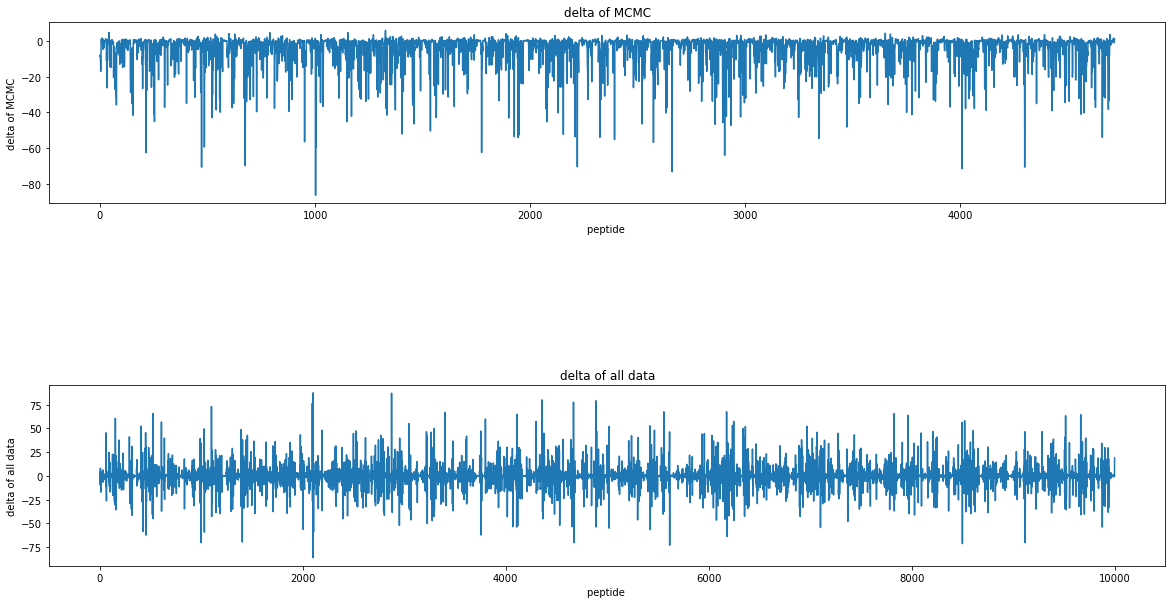

In [364]:
delta_graph(df,"probabilty_res_MCMC","all_data_prob")

In [379]:
def total_bindes_graph(df,total_binders):
    """gets the relevant columns and rturns their delta graph as function of the probabilities calaulated"""
    #fig, axs = plt.subplots(2,sharex=False)
    fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10))
    #fig, (ax1, ax2).subtitle('delta of MCMC')
    #plt.figure(figsize=(10,10))

    # Remove horizontal space between axes
    fig.subplots_adjust(hspace=1)

    # Plot each graph, and manually set the y tick values
    ax1.scatter([i for i in range(len(df.loc[df['probabilty_res_MCMC'] == "True"]))], df["total_binders"][df['probabilty_res_MCMC'] == "True"])
    plt.title("MCMC probabilities")
    ax1.title.set_text('total binders MCMC')
    ax1.set(xlabel='peptide ', ylabel='number of binders MCMC')
    #plt.ylabel("MCMC probabilities")
    #axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
    #axs[0].set_ylim(-1, 1)

    ax2.scatter(df.index,df["total_binders"])
    plt.title("all total binders")
    ax2.set(xlabel='peptide ', ylabel='number of binders of all data')
    #plt.ylabel("all probabilities")


    # axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
    # axs[1].set_ylim(0, 1)

    # axs[2].plot(t, s3)
    # axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
    # axs[2].set_ylim(-1, 1)

    plt.show()

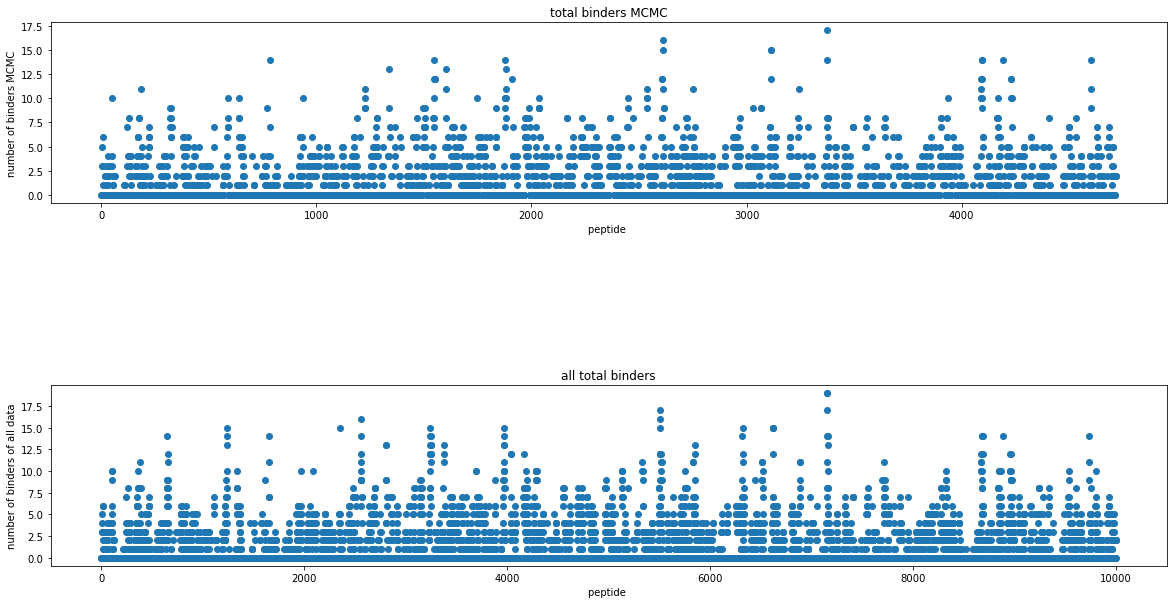

In [380]:
total_bindes_graph(df,"total_binders")

In [419]:
def graph_for_intresting_col(df,intresting_col):
    """gets the relevant columns and rturns their delta graph as function of the probabilities calaulated"""
    #fig, axs = plt.subplots(2,sharex=False)
    fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10))
    #fig, (ax1, ax2).subtitle('delta of MCMC')
    #plt.figure(figsize=(10,10))

    # Remove horizontal space between axes
    fig.subplots_adjust(hspace=1)

    # Plot each graph, and manually set the y tick values
##    ax1.scatter([i for i in range(len(df.loc[df['probabilty_res_MCMC'] == "True"]))], df[str(intresting_col)][d#f##['probabilty_res_MCMC'] == "True"])
    plt.title("MCMC probabilities")
    ax1.scatter(df.loc[df['probabilty_res_MCMC'] == "True"].index, df[str(intresting_col)][df['probabilty_res_MCMC'] == "True"])

    ax1.title.set_text('{} number of binders MCMC'.format(str(intresting_col)))
    ax1.set(xlabel='Peptide ', ylabel='{} number of binders MCMC'.format(str(intresting_col)))
    #plt.ylabel("MCMC probabilities")
    #axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
    #axs[0].set_ylim(-1, 1)

    #ax2.scatter(df.index,df[str(intresting_col)])
    ax2.scatter(df.index,df[str(intresting_col)])
    #df["peptide"]
    plt.title('{} number of binders MCMC'.format(str(intresting_col)))
    ax2.set(xlabel='peptide ', ylabel="{} of all data".format(str(intresting_col)))
    #plt.ylabel("all probabilities")


    # axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
    # axs[1].set_ylim(0, 1)

    # axs[2].plot(t, s3)
    # axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
    # axs[2].set_ylim(-1, 1)

    plt.show()

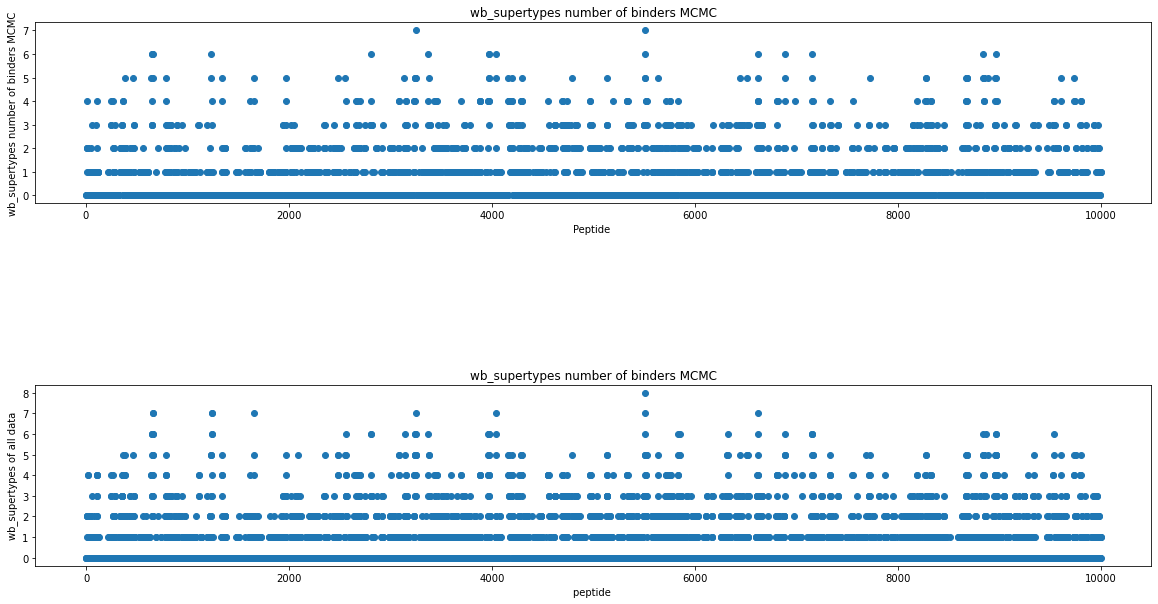

In [420]:
graph_for_intresting_col(df,"wb_supertypes")


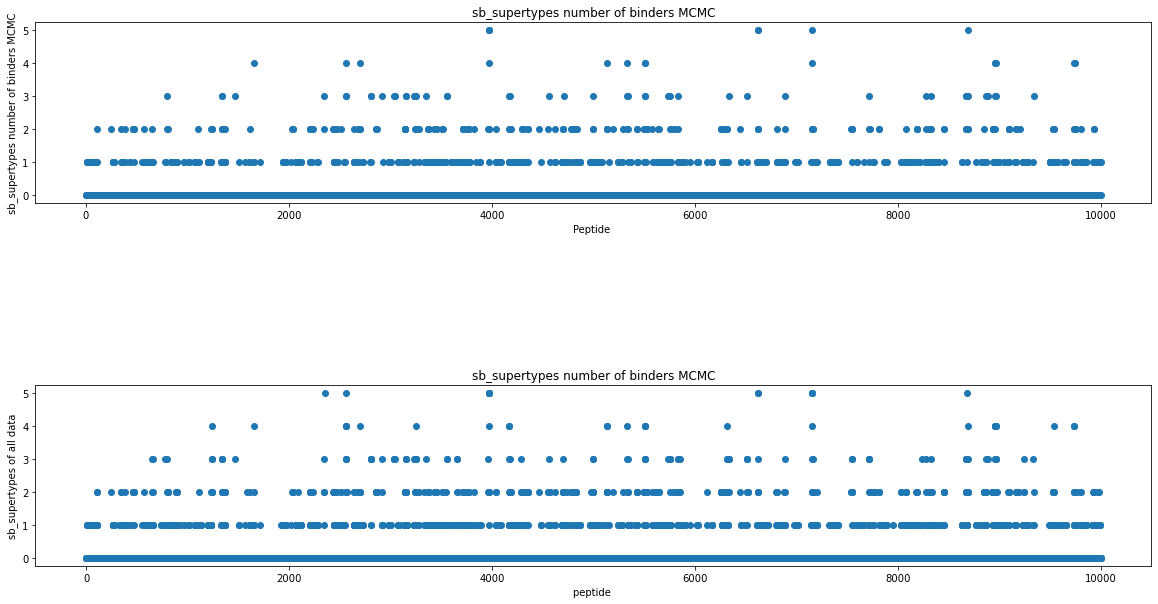

In [421]:
graph_for_intresting_col(df,"sb_supertypes")


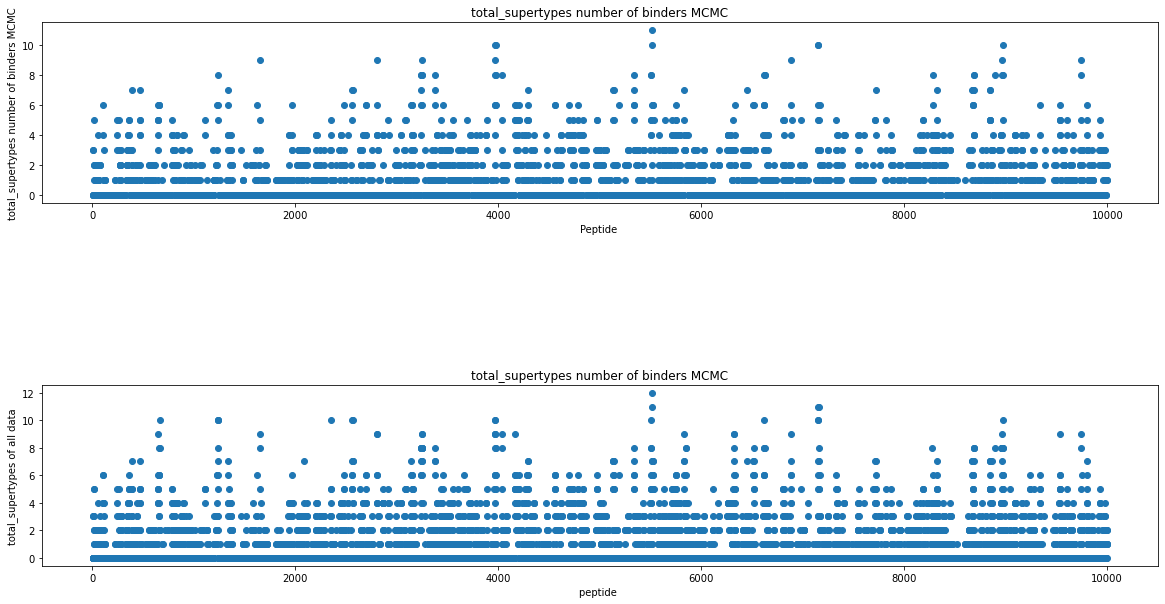

In [423]:
df["total_supertypes"]=df["sb_supertypes"]+df["wb_supertypes"]
graph_for_intresting_col(df,"total_supertypes")
